# Linear Regression Algebra

In the second Module [CompMech02-Analyze-Data](../module_02/README), you
imported data from the [NOAA](https://www.ncdc.noaa.gov/cag/) (National
Oceanic and Atmospheric Administration) youbpage. Then, you did a
piece-wise linear regression fit, but the lines youre disconnected. In
this notebook, you will look at __general linear regression__, which is
framing the our __least-sum-of-squares error__ as a linear algebra
problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Polynomials

In general, you may want to fit other polynomials besides degree-1
(straight-lines). You used the `numpy.polyfit` to accomplish this task
before
[[1]](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). 

$y=a_{0}+a_{1}x+a_{2}x^{2}+\cdots+a_{m}x^{m}+e$

Now, the solution for $a_{0},~a_{1},...a_{m}$ is the minimization of m+1-dependent linear equations. 

Consider the following data:

| x | y |
|---|---|
| 0.00 | 21.50 |
| 2.00 | 20.84 |
| 4.00 | 23.19 |
| 6.00 | 22.69 |
| 8.00 | 30.27 |
| 10.00 | 40.11 |
| 12.00 | 43.31 |
| 14.00 | 54.79 |
| 16.00 | 70.88 |
| 18.00 | 89.48 |

Text(0, 0.5, 'y')

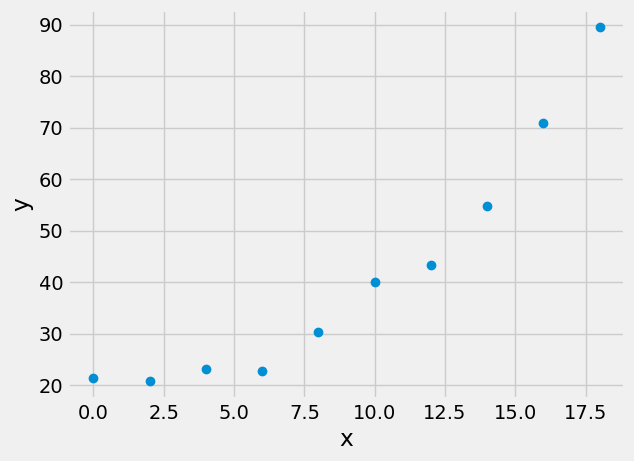

In [2]:
xy_data = np.loadtxt('../data/xy_data.csv',delimiter=',')
x=xy_data[:,0];
y=xy_data[:,1];
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

A general polynomial decription of our function, $f(\mathbf{x}),~and~\mathbf{y}$ is that you have $m+1$ unknown coefficients, where $m$ is the degree of the polynomial, and $n$ independent equations. In the example framed below, you are choosing a second-order polnomial fit. 

$\mathbf{y}=\mathbf{x}^0 a_0+\mathbf{x}^1 a_1+\mathbf{x}^2 a_2+\mathbf{e}$

$\mathbf{y}=\left[\mathbf{Z}\right]\mathbf{a}+\mathbf{e}$

where $\mathbf{a}=\left[\begin{array}{c}
        a_{0}\\
        a_{1}\\
        a_{2}\end{array}\right]$

$\mathbf{y}=\left[\begin{array} 
 1y_{1}  \\
 y_{2}  \\
 y_{3}  \\
 y_{4}  \\
 y_{5}  \\
 y_{6}  \\
 y_{7}  \\
 y_{8}  \\
 y_{9}  \\
 y_{10} \end{array}\right]$
$~~~~[\mathbf{Z}]=\left[\begin{array} 
11 & x_{1} & x_{1}^{2} \\
1 & x_{2} & x_{2}^{2} \\
1 & x_{3} & x_{3}^{2} \\
1 & x_{4} & x_{4}^{2} \\
1 & x_{5} & x_{5}^{2} \\
1 & x_{6} & x_{6}^{2} \\
1 & x_{7} & x_{7}^{2} \\
1 & x_{8} & x_{8}^{2} \\
1 & x_{9} & x_{9}^{2} \\
1 & x_{10} & x_{10}^{2} \end{array}\right]$

The sum of squares residuals for this model is formed by solving for $\mathbf{e}$, then summing the square of the elements

$\mathbf{e} = \mathbf{y}-\mathbf{Za}$

$S_{r}=\sum_{i=1}^{n}\left(y_{i}-\sum_{j=0}^{m}a_{j}z_{ji}\right)^2$

Minimizing this function, $S_r$ results in the following set of linear equations, 

$\mathbf{y}=[\mathbf{Z}]\mathbf{a}$

->**A standard Linear Algebra Problem**

*the vector a is unknown, and Z is calculated based upon the assumed function*

In [3]:
Z=np.block([[x**2],[x],[x**0]]).T

Z

array([[  0.,   0.,   1.],
       [  4.,   2.,   1.],
       [ 16.,   4.,   1.],
       [ 36.,   6.,   1.],
       [ 64.,   8.,   1.],
       [100.,  10.,   1.],
       [144.,  12.,   1.],
       [196.,  14.,   1.],
       [256.,  16.,   1.],
       [324.,  18.,   1.]])

Try to solve the problem using the built-in `np.linalg.solve` function. 

```python
>>> np.linalg.solve(Z,y)

---------------------------------------------------------------------------
LinAlgError                               Traceback (most recent call last)
<ipython-input-4-7141fd6fdc3e> in <module>
----> 1 np.linalg.solve(Z,y)

<__array_function__ internals> in solve(*args, **kwargs)

~/.conda/envs/work/lib/python3.9/site-packages/numpy/linalg/linalg.py in solve(a, b)
    378     a, _ = _makearray(a)
    379     _assert_stacked_2d(a)
--> 380     _assert_stacked_square(a)
    381     b, wrap = _makearray(b)
    382     t, result_t = _commonType(a, b)

~/.conda/envs/work/lib/python3.9/site-packages/numpy/linalg/linalg.py in _assert_stacked_square(*arrays)
    201         m, n = a.shape[-2:]
    202         if m != n:
--> 203             raise LinAlgError('Last 2 dimensions of the array must be square')
    204 
    205 def _assert_finite(*arrays):

LinAlgError: Last 2 dimensions of the array must be square
```

### Reframe the least-square problem

The solving routines that you have used (`linalg.solve` and __Gauss elimination__) all require a square matrix, so an $m\times m$ matrix. For $m$ unknowns, there should be $m$ equations. Let's revisit the least squares regression description

$~~\mathbf{y}~~~~~=~~[\mathbf{Z}]~~~~~~\mathbf{a}$

$[n\times 1]~ [n\times m][m\times 1]$

or for the second-order polynomial and 10 x- and y-points, 

$~~\mathbf{y}~~~~~=~~[\mathbf{Z}]~~~~~~\mathbf{a}$

$[10\times 1]~ [10\times 3][3\times 1]$

One way to make any matrix square is to multiply the matrix by its transpose, $Z^T Z$ is $[3\times 10][10 \times 3]=[3 \times 3]$

$~~~~~~~~~~~\mathbf{Z^Ty}~~~~~~~=~~~~~~~~[\mathbf{Z^T Z}]~~~~~~~~~~~\mathbf{a}$

$|[3\times 10][10\times 1]|~ |[3\times 10][10\times 3]|[3\times 1]$

Our final least squares linear regression is as follows

$\mathbf{Z^Ty}=[\mathbf{Z^T Z}]\mathbf{a}$

which is a $[3\times 1]=[3 \times 3][3 \times 1]$, set of equations.

In [4]:
a = np.linalg.solve(Z.T@Z,Z.T@y)
a

array([ 0.2763447 , -1.36268939, 22.46690909])

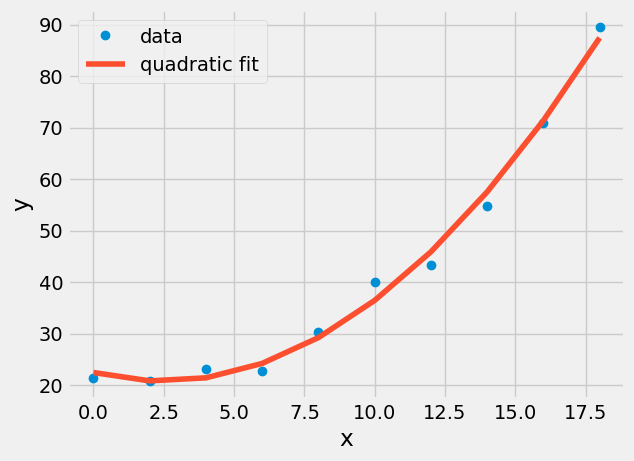

In [5]:
x_fcn=np.linspace(min(x),max(x));
plt.plot(x,y,'o',label='data')
plt.plot(x,Z@a,label='quadratic fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

### Exercise

The quadratic curve plotted should be smooth, but matplotlib connected each (x,y)-location provided with straight lines. Plot the quadratic fit with 50 x-data points to make it smooth.

## General Coefficient of Determination

The __coefficient of determination__ is a measure of how much the standard deviation is due to random error when the data is fit to a function. You make the assumption that the data has some underlying correlation in the form of a function $\mathbf{y}=f(\mathbf{x})$. So if you subtract the measured $\mathbf{y}-f(\mathbf{x})$ the result should be random error associated with noise [4]. 

The general coefficient of determination is defined as $r^2$, 

$r^{2}=\frac{S_{t}-S_{r}}{S_{t}}=1-\frac{S_{r}}{S_t}$

where $r$ is the correlation coefficient, $S_t$ is the standard deviation of the measured $\mathbf{y}$, and $S_r$ is the standard deviation of the __residuals__, $\mathbf{e} = \mathbf{y}-f(\mathbf{x}) = \mathbf{y}-\mathbf{Za}$.

In [6]:
St=np.std(y)
Sr=np.std(y-Z@a)

In [7]:
r2=1-Sr/St;
r=np.sqrt(r2);

print('the coefficient of determination for this fit is {}'.format(r2))
print('the correlation coefficient this fit is {}'.format(r))

the coefficient of determination for this fit is 0.9111905603853598
the correlation coefficient this fit is 0.954563020646285


### Discussion

What is the highest possible coefficient of determination? If its maximized, is that a _good_ thing?

### Exercise

Compare the coefficient of determination for a straight line _(you have to do a fit)_ to the quadratic fit _(done above)_. Which one is a better fit?

## Overfitting Warning 
**Coefficient of determination reduction does not always mean a better fit**

You will always increase the coefficient of determination and decrease the total sum of squares error by adding more terms to your function. This is called __overfitting__ your data. It is especially evident in polynomial fits, because they can behave unpredictably with higher order terms. 

## Nanonindentation data engineering model vs higher-order fit

Now, use experimental data from some [atomic force microscope nanoindentation of $MoS_2$ [2]](https://pdfs.semanticscholar.org/68c4/0c4eef562e2ac785fb7b4bcd6ee8229f2424.pdf). One of the nanoidentation experimental data files is in the data folder (`../data/mos2_afm.csv`). 

The experiment pushes an AFM tip into the center of a hole covered with
a single layer of $MoS_2$, 0.6-nm thick. A diagram is shown below. 

<img src="https://github.com/cooperrc/computational-mechanics/blob/master/images/afm_mos2.png?raw=true" style="width: 300px;"/> 

As the center of a thin sheet of $MoS_2$ is pushed downwards the tension increases, resulting in higher measured force. An engineering equation for this increase in force is as such

$F = A\delta + B \delta^3$

where $\delta$ is the deflection of the sheet (z in the data), $A=\pi\sigma_0t$,  $B=1.09Et/r^2$, $\sigma_0$ is the prestress in the sheet, $E$ is the Young's modulus, $t=0.6~nm$ is the thickness, and $r=260~nm$ is the radius of the sheet (they youre designed to be 250 nm, but there is some variation in microfabrication).

In [8]:
! head ../data/mos2_afm.csv

Z (nm),F (nN)
0,0
-0.011669,0.9
-0.0058346,0.45
0.3075,-1.35
0.29583,-0.45
0.5725,1.35
0.57833,0.9
0.5607,2.26
0.85666,1.8


### Build a statistical model with Python's Statsmodel

In the first Linear regression example in linear algebra, you built the $\mathbf{Z}$ matrix and set up the least squares problem in the form

$\mathbf{Z}^T\mathbf{ZA} = \mathbf{Z}^T\mathbf{y}$.

Now, try using the [`statsmodel.ols`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) ordinary least squares statistical model solution. You use `ols` in two steps

1. build the model with the function and the measurements, $\mathbf{Z}~and~\mathbf{y}$
2. use the `fit` function to get statistical information about your best-fit model

In [9]:
import statsmodels.api as sm

mos2 = np.loadtxt('../data/mos2_afm.csv',delimiter=',',skiprows=1)
d = mos2[:,0] # deflection data
F = mos2[:,1] # force data
Z = d[:, np.newaxis]**[3, 1]
y = F

model = sm.OLS(y, Z)

ModuleNotFoundError: No module named 'statsmodels'

Now, you have a variable, `model`, that contains the measured values of force and assumed function, $F=A_0 \delta^3 + A_1 \delta^1$. Save the statistical output in the variable `results`. The `statsmodel` fit contains _a lot_ of information. For now, look at two of the outputs

1. `results.params`: the coefficients $A_0~and~A_1$
1. `results.summary`: a statistical report on the best-fit model including
    - standard error of coefficients, **std error**
    - coefficient of determination **R-squared**

In [ ]:
results = model.fit()
A = results.params
print('coeffictients are A0 = {}, A1 = {}'.format(*A))
print('Statsmodel summary of model')
plt.plot(d, F)
plt.plot(d,F,'.',label='afm data')
plt.plot(d,Z@results.params,label='best fit curve')
plt.title('Best fit curve and AFM data')
plt.xlabel('deflection (nm)')
plt.ylabel('Force (nN)')
plt.legend();
results.summary()

In [ ]:
results?

In [ ]:
print('Youngs modulus from fit = {:.0f} GPa'.format(A[0]/1.09/0.61*260**2))
print('Youngs modulus reported = 210 GPa')

### Beyond polynomials

Linear Regression is only limited by the ability to separate the parameters from the function to achieve

$\mathbf{y}=[\mathbf{Z}]\mathbf{a}$

$\mathbf{Z}$ can be any function of the independent variable(s). 

**Example**:
Let's take some voltage-vs-time data that you know has two frequency components, $\sin(t)$ and $\sin(3t)$. You want to know what amplitudes are associated with each signal. 

$\mathbf{V}_{measured}=[\sin(t) \sin(3t)][amp_{1t},~amp_{3t}]^T$

In [ ]:
sin_data = np.loadtxt('../data/sin_data.csv')
t = sin_data[0,:];
V = sin_data[1,:];
plt.plot(t,V)
plt.xlabel('time (s)')
plt.ylabel('voltage (V)');

In [ ]:
Z = np.block([[np.sin(t)],[np.sin(3*t)]]).T
model = sm.OLS(V, Z)
results = model.fit()
amps = results.params

In [ ]:
plt.plot(t, V, 's')
plt.plot(t, Z@amps)
plt.title('Amplitudes of sin(t) and sin(3t) signals\n {:.3f} V and {:.3f} V'.format(*amps));

## Fitting the Global Temperature Anomolies again

Now, you have the right tools to fit our Global temperature anomolies properly. Let's create a function with three constants

$f(t)= A\cdot t+B+ C\cdot H(t-1970)(t)$

Where, $A$ is the slope from time 1880-1970, B is the intercept
(extrapolated temp anomoly at 0 A.D.), and C is the increase in slope
after 1970, activated with a heaviside function, $H(t-1970)=$ `t>=1970`. Our regression is still linear because each constant can be pulled out of our function to form $\mathbf{Z}$. 

$\mathbf{Temp} = [t~~t^0~~(t-1970)\cdot H(t-1970)][A,~B,~C]^T$

In [ ]:
fname = '../data/land_global_temperature_anomaly-1880-2016.csv'

temp_data = pd.read_csv(fname,skiprows=4)

t = temp_data['Year'].values
T = temp_data['Value'].values

Z= np.block([[t],[t**0],[(t-1970)*(t>=1970)]]).T

print('This is every 10th row of Z')
print('---------------------------')
print(Z[::10])

In [ ]:
fit = np.linalg.solve(Z.T@Z,Z.T@T)
#print(Z)

plt.plot(t,T,'o-',label='measured anomoly')
plt.plot(t,Z@fit,label='piece-wise best-fit')
plt.title('Piecewise fit to temperature anomoly')
plt.legend();

## What You've Learned

* How to use the _general least squares regression_ method for almost any function
* How to calculate the coefficient of determination and correlation coefficient for a general least squares regression, $r^2~ and~ r$
* Why you need to avoid __overfitting__
* How to construct general least squares regression using the dependent and independent data to form $\mathbf{y}=\mathbf{Za}$. 
* How to construct a piecewise linear regression 

## References

1. [Numpy polyfit documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

2. [Cooper _et. al_ 2014. Nonlinear Elastic Constants of $MoS_2$. _Phys. Rev. B_ 2013.](https://pdfs.semanticscholar.org/68c4/0c4eef562e2ac785fb7b4bcd6ee8229f2424.pdf)

3. [Figueroa _et al._ Stress Relaxation and Creep Recovery Tests Performed on Wheat Kernels Versus Doughs: Influence of Glutenins on Rheological and Quality Properties. ](https://www.cerealsgrains.org/publications/plexus/cfw/pastissues/2013/Documents/CFW-58-3-0139.pdf)

4. Chapra, Steven _Applied Numerical Methods with Matlab for Engineers._ __ch 14.__ McGraw Hill.

5. [Koerson, William. Overfitting vs. Underfitting: A Complete Example](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)